In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b6b73150-ef48-4474-b6b7-4252f2e26b4b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-05-04T08:15:32.777Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9462}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10200, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [47]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [48]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)  # Add +5 to the UTC for the current time on timestamp
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10200,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19363912.00000,19363912.00000,False,NaN,1,NaN,NaN,None,2023-05-04T08:13:00.000Z,29064.79984,19343124721.49952,19.40070,-0.30726,1.48231,0.88212,3.74929,29.78164,24.05265,562808226361.13647,47.07210,610360796598.53003,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
1,1027,Ethereum,ETH,ethereum,6822,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120375861.85835,120375861.85835,False,NaN,2,NaN,NaN,None,2023-05-04T08:13:00.000Z,1900.04443,8610341147.06841,21.85200,0.01219,1.89802,1.00419,4.82221,21.05404,16.10817,228719485657.66751,19.13100,228719485657.67001,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
2,825,Tether,USDT,tether,52488,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,81985825504.86801,85090638896.26192,False,NaN,3,NaN,NaN,None,2023-05-04T08:13:00.000Z,1.00039,29961542921.74396,22.58980,0.00493,-0.00799,-0.01948,0.02309,0.02610,0.02737,82017465216.94408,6.85830,85123476808.16000,None,2023-05-04T08:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-05 09:23:34.516851+00:00
3,1839,BNB,BNB,bnb,1322,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155862058.45462,155862058.45462,False,NaN,4,NaN,NaN,None,2023-05-04T08:13:00.000Z,325.77577,711158479.53608,-4.06310,-0.20963,0.78679,-1.47903,5.13909,12.12098,1.17562,50776082253.50244,4.24590,50776082253.50000,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
4,3408,USD Coin,USDC,usd-coin,12155,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30174234751.90626,30174234751.90626,False,NaN,5,NaN,NaN,None,2023-05-04T08:13:00.000Z,0.99997,3799982336.58563,40.25690,-0.00033,-0.00791,-0.02766,0.02371,-0.00530,0.00894,30173319733.53776,2.52310,30173319733.54000,None,2023-05-04T08:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-05 09:23:34.516851+00:00
5,52,XRP,XRP,xrp,940,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51768283547.00000,99988981135.00000,False,NaN,6,NaN,NaN,None,2023-05-04T08:13:00.000Z,0.46181,1001836335.47892,14.78540,-0.07959,0.60242,0.23221,-7.01979,23.75239,12.44465,23906995854.82005,1.99910,46180777527.84000,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
6,2010,Cardano,ADA,cardano,779,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34817152299.72300,35744572183.81100,False,NaN,7,NaN,NaN,None,2023-05-04T08:13:00.000Z,0.39287,261318179.93385,28.62840,-0.30606,2.05426,-3.74857,0.56423,15.86978,-1.67225,13678689042.67448,1.14380,17679246183.65000,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
7,74,Dogecoin,DOGE,dogecoin,701,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139203386383.70523,139203386383.70523,False,NaN,8,NaN,NaN,None,2023-05-04T08:13:00.000Z,0.07932,312302653.09440,39.32390,-0.11418,1.32612,-0.44116,-19.47652,5.24504,-13.02233,11041633029.63906,0.92360,1104163302

In [49]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b6b73150-ef48-4474-b6b7-4252f2e26b4b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc=True)  # Add +5 to the UTC for the current time on timestamp
    df = df.append(df2)

# If you want to automate this process and store the data into a csv, then run the following code:
#      df = pd.json_normalize(data['data'])
#      df['timestamp'] = pd.to_datetime('now', utc=True)  # Add +5 to the UTC for the current time on timestamp
#      df  
# Then run this: 
#    if not os.path.isfile(r'C:\Users\Mohammad Anas\API.csv'):
#        df.to_csv(r'C:\Users\Mohammad Anas\API.csv', header = 'column_names')
#    else:
#        df.to_csv(r'C:\Users\Mohammad Anas\API.csv', mode = 'a', header = False)
# Then, to read the csv, run this: 
#    df27 = pd.read_csv(r'C:\Users\Mohammad Anas\API.csv')
#    df27

In [83]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed successfully.')
    sleep(60)  # sleep for 1 minute
exit()

C:\Users\Mohammad Anas\AppData\Local\Temp\ipykernel_8300\634708001.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runner completed successfully.


C:\Users\Mohammad Anas\AppData\Local\Temp\ipykernel_8300\634708001.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runner completed successfully.


C:\Users\Mohammad Anas\AppData\Local\Temp\ipykernel_8300\634708001.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runner completed successfully.


C:\Users\Mohammad Anas\AppData\Local\Temp\ipykernel_8300\634708001.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runner completed successfully.


C:\Users\Mohammad Anas\AppData\Local\Temp\ipykernel_8300\634708001.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runner completed successfully.


C:\Users\Mohammad Anas\AppData\Local\Temp\ipykernel_8300\634708001.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runner completed successfully.


C:\Users\Mohammad Anas\AppData\Local\Temp\ipykernel_8300\634708001.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runner completed successfully.


C:\Users\Mohammad Anas\AppData\Local\Temp\ipykernel_8300\634708001.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runner completed successfully.


C:\Users\Mohammad Anas\AppData\Local\Temp\ipykernel_8300\634708001.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runner completed successfully.


C:\Users\Mohammad Anas\AppData\Local\Temp\ipykernel_8300\634708001.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runner completed successfully.


KeyboardInterrupt: 

In [84]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10200,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19363912.00000,19363912.00000,False,NaN,1,NaN,NaN,None,2023-05-04T08:13:00.000Z,29064.79984,19343124721.49952,19.40070,-0.30726,1.48231,0.88212,3.74929,29.78164,24.05265,562808226361.13647,47.07210,610360796598.53003,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
1,1027,Ethereum,ETH,ethereum,6822,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120375861.85835,120375861.85835,False,NaN,2,NaN,NaN,None,2023-05-04T08:13:00.000Z,1900.04443,8610341147.06841,21.85200,0.01219,1.89802,1.00419,4.82221,21.05404,16.10817,228719485657.66751,19.13100,228719485657.67001,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
2,825,Tether,USDT,tether,52488,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,81985825504.86801,85090638896.26192,False,NaN,3,NaN,NaN,None,2023-05-04T08:13:00.000Z,1.00039,29961542921.74396,22.58980,0.00493,-0.00799,-0.01948,0.02309,0.02610,0.02737,82017465216.94408,6.85830,85123476808.16000,None,2023-05-04T08:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-05 09:23:34.516851+00:00
3,1839,BNB,BNB,bnb,1322,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155862058.45462,155862058.45462,False,NaN,4,NaN,NaN,None,2023-05-04T08:13:00.000Z,325.77577,711158479.53608,-4.06310,-0.20963,0.78679,-1.47903,5.13909,12.12098,1.17562,50776082253.50244,4.24590,50776082253.50000,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
4,3408,USD Coin,USDC,usd-coin,12155,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30174234751.90626,30174234751.90626,False,NaN,5,NaN,NaN,None,2023-05-04T08:13:00.000Z,0.99997,3799982336.58563,40.25690,-0.00033,-0.00791,-0.02766,0.02371,-0.00530,0.00894,30173319733.53776,2.52310,30173319733.54000,None,2023-05-04T08:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-05 09:23:34.516851+00:00
5,52,XRP,XRP,xrp,940,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51768283547.00000,99988981135.00000,False,NaN,6,NaN,NaN,None,2023-05-04T08:13:00.000Z,0.46181,1001836335.47892,14.78540,-0.07959,0.60242,0.23221,-7.01979,23.75239,12.44465,23906995854.82005,1.99910,46180777527.84000,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
6,2010,Cardano,ADA,cardano,779,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34817152299.72300,35744572183.81100,False,NaN,7,NaN,NaN,None,2023-05-04T08:13:00.000Z,0.39287,261318179.93385,28.62840,-0.30606,2.05426,-3.74857,0.56423,15.86978,-1.67225,13678689042.67448,1.14380,17679246183.65000,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
7,74,Dogecoin,DOGE,dogecoin,701,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139203386383.70523,139203386383.70523,False,NaN,8,NaN,NaN,None,2023-05-04T08:13:00.000Z,0.07932,312302653.09440,39.32390,-0.11418,1.32612,-0.44116,-19.47652,5.24504,-13.02233,11041633029.63906,0.92360,1104163302

In [85]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [86]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10200,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19363912.00000,19363912.00000,False,NaN,1,NaN,NaN,None,2023-05-04T08:13:00.000Z,29064.79984,19343124721.49952,19.40070,-0.30726,1.48231,0.88212,3.74929,29.78164,24.05265,562808226361.13647,47.07210,610360796598.53003,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
1,1027,Ethereum,ETH,ethereum,6822,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120375861.85835,120375861.85835,False,NaN,2,NaN,NaN,None,2023-05-04T08:13:00.000Z,1900.04443,8610341147.06841,21.85200,0.01219,1.89802,1.00419,4.82221,21.05404,16.10817,228719485657.66751,19.13100,228719485657.67001,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
2,825,Tether,USDT,tether,52488,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,81985825504.86801,85090638896.26192,False,NaN,3,NaN,NaN,None,2023-05-04T08:13:00.000Z,1.00039,29961542921.74396,22.58980,0.00493,-0.00799,-0.01948,0.02309,0.02610,0.02737,82017465216.94408,6.85830,85123476808.16000,None,2023-05-04T08:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-05 09:23:34.516851+00:00
3,1839,BNB,BNB,bnb,1322,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155862058.45462,155862058.45462,False,NaN,4,NaN,NaN,None,2023-05-04T08:13:00.000Z,325.77577,711158479.53608,-4.06310,-0.20963,0.78679,-1.47903,5.13909,12.12098,1.17562,50776082253.50244,4.24590,50776082253.50000,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
4,3408,USD Coin,USDC,usd-coin,12155,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30174234751.90626,30174234751.90626,False,NaN,5,NaN,NaN,None,2023-05-04T08:13:00.000Z,0.99997,3799982336.58563,40.25690,-0.00033,-0.00791,-0.02766,0.02371,-0.00530,0.00894,30173319733.53776,2.52310,30173319733.54000,None,2023-05-04T08:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-05 09:23:34.516851+00:00
5,52,XRP,XRP,xrp,940,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51768283547.00000,99988981135.00000,False,NaN,6,NaN,NaN,None,2023-05-04T08:13:00.000Z,0.46181,1001836335.47892,14.78540,-0.07959,0.60242,0.23221,-7.01979,23.75239,12.44465,23906995854.82005,1.99910,46180777527.84000,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
6,2010,Cardano,ADA,cardano,779,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34817152299.72300,35744572183.81100,False,NaN,7,NaN,NaN,None,2023-05-04T08:13:00.000Z,0.39287,261318179.93385,28.62840,-0.30606,2.05426,-3.74857,0.56423,15.86978,-1.67225,13678689042.67448,1.14380,17679246183.65000,None,2023-05-04T08:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-05 09:23:34.516851+00:00
7,74,Dogecoin,DOGE,dogecoin,701,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139203386383.70523,139203386383.70523,False,NaN,8,NaN,NaN,None,2023-05-04T08:13:00.000Z,0.07932,312302653.09440,39.32390,-0.11418,1.32612,-0.44116,-19.47652,5.24504,-13.02233,11041633029.63906,0.92360,1104163302

In [87]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.02297,0.18019,-0.38454,2.12840,29.92156,24.65218
Ethereum,0.08108,0.05161,-0.36852,-0.20551,21.51487,14.81846
Tether,-0.01234,0.01171,0.00948,0.01744,0.03748,0.03749
BNB,-0.03002,-0.29779,1.11093,3.28884,13.71874,-1.03724
USD Coin,-0.00988,0.00028,0.00265,0.00885,-0.00202,-0.00086
XRP,-0.23722,-0.03342,-2.36871,-10.65671,26.61056,12.36062
Cardano,-0.20724,-0.83336,-4.32333,-1.66450,16.29113,-2.74851
Dogecoin,0.00321,-0.51233,-1.83546,-18.76927,6.38116,-15.77461
Polygon,-0.15488,-0.77764,-1.12728,-13.85859,-12.09290,-18.95691


In [88]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.02297
             quote.USD.percent_change_24h     0.18019
             quote.USD.percent_change_7d     -0.38454
             quote.USD.percent_change_30d     2.12840
             quote.USD.percent_change_60d    29.92156
             quote.USD.percent_change_90d    24.65218
Ethereum     quote.USD.percent_change_1h      0.08108
             quote.USD.percent_change_24h     0.05161
             quote.USD.percent_change_7d     -0.36852
             quote.USD.percent_change_30d    -0.20551
             quote.USD.percent_change_60d    21.51487
             quote.USD.percent_change_90d    14.81846
Tether       quote.USD.percent_change_1h     -0.01234
             quote.USD.percent_change_24h     0.01171
             quote.USD.percent_change_7d      0.00948
             quote.USD.percent_change_30d     0.01744
             quote.USD.percent_change_60d     0.03748
             quote.USD.percent_change_90

In [89]:
type(df3)

pandas.core.frame.DataFrame

In [90]:
type(df4)

pandas.core.series.Series

In [91]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.02297
            quote.USD.percent_change_24h   0.18019
            quote.USD.percent_change_7d   -0.38454
            quote.USD.percent_change_30d   2.12840
            quote.USD.percent_change_60d  29.92156
            quote.USD.percent_change_90d  24.65218
Ethereum    quote.USD.percent_change_1h    0.08108
            quote.USD.percent_change_24h   0.05161
            quote.USD.percent_change_7d   -0.36852
            quote.USD.percent_change_30d  -0.20551
            quote.USD.percent_change_60d  21.51487
            quote.USD.percent_change_90d  14.81846
Tether      quote.USD.percent_change_1h   -0.01234
            quote.USD.percent_change_24h   0.01171
            quote.USD.percent_change_7d    0.00948
            quote.USD.percent_change_30d   0.01744
            quote.USD.percent_change_60d   0.03748
            quote.USD.percent_change_90d   0.03749
BNB         quote.USD.percent_change_1h   -0.03002
            quote.USD.percent_change_24h  -0.29779
            quote.USD.percent_change_7d    1.11093
            quote.USD.percent_change_30d   3.28884
            quote.USD.percent_change_60d  13.71874
            quote.USD.percent_change_90d  -1.03724
USD Coin    quote.USD.percent_change_1h   -0.00988
            quote.USD.percent_change_24h   0.00028
            quote.USD.percent_change_7d    0.00265
            quote.USD.percent_change_30d   0.00885
            quote.USD.percent_change_60d  -0.00202
            quote.USD.percent_change_90d  -0.00086
XRP         quote.USD.percent_change_1h   -0.23722
            quote.USD.percent_change_24h  -0.03342
            quote.USD.percent_change_7d   -2.36871
            quote.USD.percent_change_30d -10.65671
            quote.USD.percent_change_60d  26.61056
            quote.USD.percent_change_90d  12.36062
Cardano     quote.USD.percent_change_1h   -0.20724
            quote.USD.percent_change_24h  -0.83336
            quote.USD.percent_change_7d   -4.32333
            quote.USD.percent_change_30d  -1.66450
            quote.USD.percent_change_60d  16.29113
            quote.USD.percent_change_90d  -2.74851
Dogecoin    quote.USD.percent_change_1h    0.00321
            quote.USD.percent_change_24h  -0.51233
            quote.USD.percent_change_7d   -1.83546
            quote.USD.percent_change_30d -18.76927
            quote.USD.percent_change_60d   6.38116
            quote.USD.percent_change_90d -15.77461
Polygon     quote.USD.percent_change_1h   -0.15488
            quote.USD.percent_change_24h  -0.77764
            quote.USD.percent_change_7d   -1.12728
            quote.USD.percent_change_30d -13.85859
            quote.USD.percent_change_60d -12.09290
            quote.USD.percent_change_90d -18.95691
Solana      quote.USD.percent_change_1h    0.04048
            quote.USD.percent_change_24h  -1.21830
            quote.USD.percent_change_7d   -2.26123
            quote.USD.percent_change_30d   3.37314
            quote.USD.percent_change_60d   5.49559
            quote.USD.percent_change_90d -10.59612
Polkadot    quote.USD.percent_change_1h   -0.07866
            quote.USD.percent_change_24h   0.38679
            quote.USD.percent_change_7d   -2.03904
            quote.USD.percent_change_30d -11.54255
            quote.USD.percent_change_60d  -2.90752
            quote.USD.percent_change_90d -15.93150
Litecoin    quote.USD.percent_change_1h   -0.08039
            quote.USD.percent_change_24h  -0.33719
            quote.USD.percent_change_7d   -1.84961
            quote.USD.percent_change_30d  -6.95012
            quote.USD.percent_change_60d  -0.51945
            quote.USD.percent_change_90d -10.97398
TRON        quote.USD.percent_change_1h    0.09669
            quote.USD.percent_change_24h   0.92571
            quote.USD.percent_change_7d    5.62973
            quote.USD.percent_change_30d   5.15111
            quote.USD.percent_change_60d   4.33089
            quo

In [92]:
type(df5)

pandas.core.frame.DataFrame

In [93]:
df5.count()

values    90
dtype: int64

In [94]:
# Column names in df5 would act as an index and we don't want that for 
# visualization purposes. So we are going to create an index.
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.02297
1,Bitcoin,quote.USD.percent_change_24h,0.18019
2,Bitcoin,quote.USD.percent_change_7d,-0.38454
3,Bitcoin,quote.USD.percent_change_30d,2.12840
4,Bitcoin,quote.USD.percent_change_60d,29.92156
5,Bitcoin,quote.USD.percent_change_90d,24.65218
6,Ethereum,quote.USD.percent_change_1h,0.08108
7,Ethereum,quote.USD.percent_change_24h,0.05161
8,Ethereum,quote.USD.percent_change_7d,-0.36852
9,Ethereum,quote.USD.percent_change_30d,-0.20551


In [95]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.02297
1,Bitcoin,quote.USD.percent_change_24h,0.18019
2,Bitcoin,quote.USD.percent_change_7d,-0.38454
3,Bitcoin,quote.USD.percent_change_30d,2.12840
4,Bitcoin,quote.USD.percent_change_60d,29.92156
5,Bitcoin,quote.USD.percent_change_90d,24.65218
6,Ethereum,quote.USD.percent_change_1h,0.08108
7,Ethereum,quote.USD.percent_change_24h,0.05161
8,Ethereum,quote.USD.percent_change_7d,-0.36852
9,Ethereum,quote.USD.percent_change_30d,-0.20551


In [96]:
type(df7)

pandas.core.frame.DataFrame

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

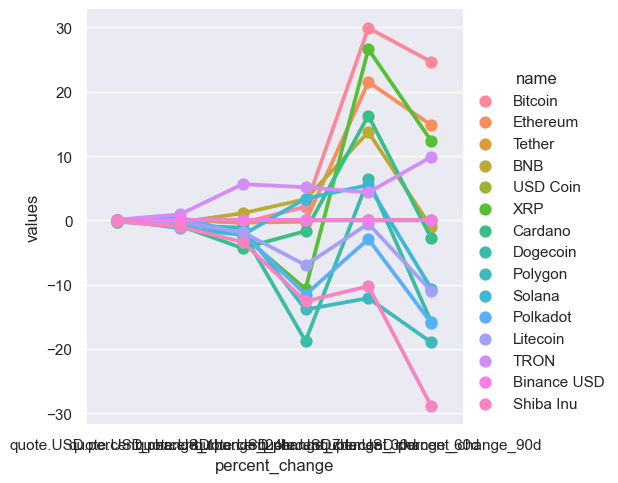

In [98]:
sns.catplot(x='percent_change', y='values',hue = 'name', data = df7, kind = 'point')

In [99]:
# In the graph above, on the x-axis, the name of the percent_cahnge columns (or rows in this case) 
# makes the x-axis look like a mess. So, we are going to change the name of that.

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1h','24h','7d','30d','60d','90d'])

In [100]:
df7

,name,percent_change,values
0,Bitcoin,1h,0.02297
1,Bitcoin,24h,0.18019
2,Bitcoin,7d,-0.38454
3,Bitcoin,30d,2.12840
4,Bitcoin,60d,29.92156
5,Bitcoin,90d,24.65218
6,Ethereum,1h,0.08108
7,Ethereum,24h,0.05161
8,Ethereum,7d,-0.36852
9,Ethereum,30d,-0.20551


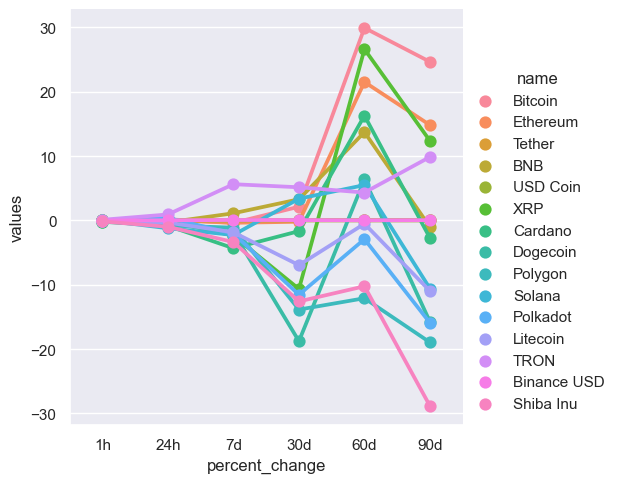

In [101]:
sns.catplot(x='percent_change', y='values',hue = 'name', data = df7, kind = 'point')

In [102]:
# Lets say we only wanted to see the data for only a specific coin. e.g., Bitcoin.
# Then, we'd do this:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,29064.79984,2023-05-05 09:23:34.516851+00:00
0,Bitcoin,29086.51780,2023-05-05 09:23:51.100766+00:00
0,Bitcoin,29093.13299,2023-05-05 09:24:51.704778+00:00
0,Bitcoin,29108.62361,2023-05-05 09:25:52.700367+00:00
0,Bitcoin,29113.16630,2023-05-05 09:26:53.881496+00:00
0,Bitcoin,29109.91730,2023-05-05 09:27:55.120422+00:00
0,Bitcoin,29113.71425,2023-05-05 09:53:57.914181+00:00
0,Bitcoin,29110.17357,2023-05-05 09:54:58.560779+00:00
0,Bitcoin,29117.78944,2023-05-05 09:55:59.563235+00:00
0,Bitcoin,29114.66155,2023-05-05 09:57:00.732476+00:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

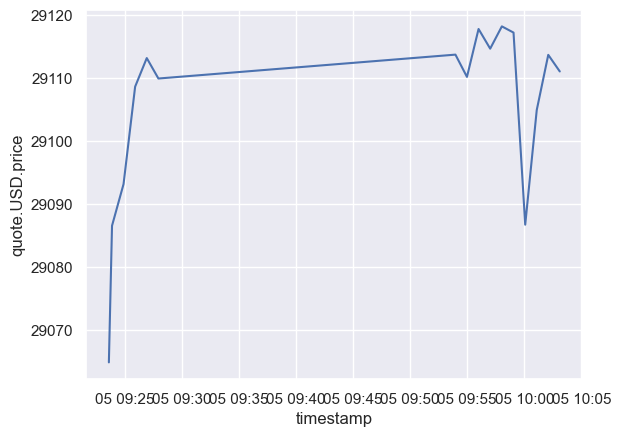

In [103]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)